In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict,RandomizedSearchCV

from sklearn.metrics import  mean_absolute_error,r2_score,mean_pinball_loss, mean_squared_error


df = pd.read_feather('output/train_test2')

df = df.dropna()
#test = df.loc[df.norm_diff>70]
#test.groupby(['start','mrms_lat','mrms_lon']).count()
# this gage has most big outliers, see code above, remove it
df = df.loc[(df.mrms_lat!=40.57499999999929)&(df.mrms_lon!=254.91499899999639)]

df = df.loc[(df.total_mrms_accum>1)].reset_index(drop=True)

df = df.drop(columns=['start','storm_id'])

In [2]:
grouped = df.groupby(['mrms_lat','mrms_lon']).count().total_mrms_accum
weights = 1.0 / grouped

test = grouped.sample(frac=.25,weights = weights, random_state=55).reset_index()

test_lat,test_lon = test.mrms_lat,test.mrms_lon
test = df.loc[(df.mrms_lat.isin(test_lat))&(df.mrms_lon.isin(test_lon))]
train = df.loc[~df.index.isin(test.index)]
print(len(test)/len(df))
print(len(train)/len(df))

n_splits = 5
split_idx = []

train = train.reset_index(drop=True)
sample = train

for i in range(n_splits):
    test_s = sample.groupby(['mrms_lat','mrms_lon']).count().total_mrms_accum

    weights = 1.0 / grouped

    split = test_s.sample(frac=1/(n_splits-i), weights=weights,random_state=3).reset_index()

    split_lat,split_lon = split.mrms_lat,split.mrms_lon
    
    split = sample.loc[(sample.mrms_lat.isin(split_lat))&(sample.mrms_lon.isin(split_lon))]
    
    split_idx.append(split.index)
    print(len(split.index)/len(train))
    sample = sample.loc[~sample.index.isin(split.index)]

cv = []

for i in range(n_splits):
    fold_test_idx = split_idx[i]
    fold_train_idx = train.loc[~train.index.isin(fold_test_idx)].index
    cv.append([fold_train_idx,fold_test_idx])

0.1861508507576399
0.8138491492423601
0.15442757090354345
0.18774703557312253
0.19977810137993204
0.2076485680604674
0.2503987240829346


In [3]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = (scaler.fit_transform(train.drop(columns=['norm_diff'])),
                                    
scaler.fit_transform(test.drop(columns=['norm_diff'])),
train.norm_diff.values,
test.norm_diff.values)

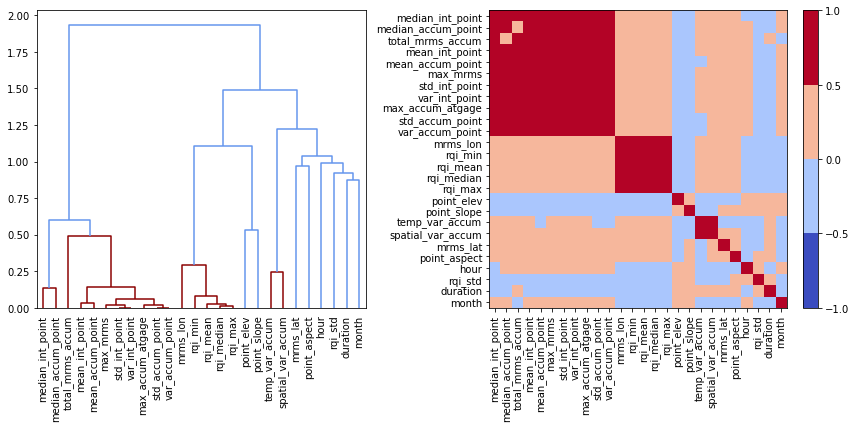

In [4]:
import sys
sys.path.append('test')
from feature_select import feature_select
all_permutations, plot = feature_select(X_train, df)

In [5]:
X_train[:,all_permutations[0]]

array([[-0.48527416, -0.17849599, -0.42676045, ..., -0.63761596,
        -1.61824291,  0.69170088],
       [-0.48527416, -0.17849599, -0.47652874, ..., -0.63761596,
        -1.61824291,  0.69170088],
       [-0.48527416, -0.17849599, -0.06345193, ..., -0.63761596,
        -1.61824291, -0.3155658 ],
       ...,
       [-0.13630838,  0.50748217, -0.31616425, ...,  1.91278043,
         0.01024051, -1.18197729],
       [-0.13630838,  0.50748217,  1.08619557, ...,  1.91278043,
         0.01024051, -0.80942996],
       [-0.13630838,  0.50748217, -0.63412833, ...,  1.91278043,
         0.01024051, -0.95187771]])

In [6]:
df = pd.DataFrame(X_train[:,all_permutations[0]])

In [7]:
correlation_matrix = df.corr()

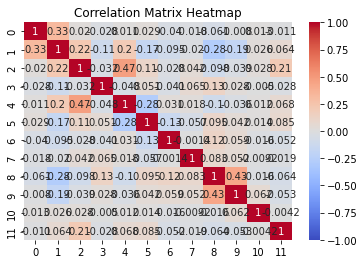

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

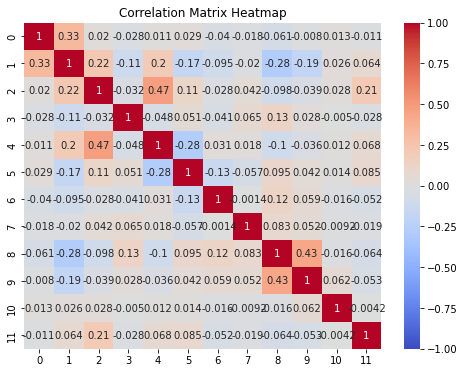

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Generating a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict,RandomizedSearchCV

from sklearn.metrics import  mean_absolute_error,r2_score,mean_pinball_loss, mean_squared_error


df = pd.read_feather('output/train_test2')

df = df.dropna()
#test = df.loc[df.norm_diff>70]
#test.groupby(['start','mrms_lat','mrms_lon']).count()
# this gage has most big outliers, see code above, remove it
df = df.loc[(df.mrms_lat!=40.57499999999929)&(df.mrms_lon!=254.91499899999639)]

df = df.loc[(df.total_mrms_accum>1)].reset_index(drop=True)

df = df.drop(columns=['start','storm_id'])

In [11]:
grouped = df.groupby(['mrms_lat','mrms_lon']).count().total_mrms_accum
weights = 1.0 / grouped

test = grouped.sample(frac=.25,weights = weights, random_state=55).reset_index()

test_lat,test_lon = test.mrms_lat,test.mrms_lon
test = df.loc[(df.mrms_lat.isin(test_lat))&(df.mrms_lon.isin(test_lon))]
train = df.loc[~df.index.isin(test.index)]
print(len(test)/len(df))
print(len(train)/len(df))

n_splits = 5
split_idx = []

train = train.reset_index(drop=True)
sample = train

for i in range(n_splits):
    test_s = sample.groupby(['mrms_lat','mrms_lon']).count().total_mrms_accum

    weights = 1.0 / grouped

    split = test_s.sample(frac=1/(n_splits-i), weights=weights,random_state=3).reset_index()

    split_lat,split_lon = split.mrms_lat,split.mrms_lon
    
    split = sample.loc[(sample.mrms_lat.isin(split_lat))&(sample.mrms_lon.isin(split_lon))]
    
    split_idx.append(split.index)
    print(len(split.index)/len(train))
    sample = sample.loc[~sample.index.isin(split.index)]

cv = []

for i in range(n_splits):
    fold_test_idx = split_idx[i]
    fold_train_idx = train.loc[~train.index.isin(fold_test_idx)].index
    cv.append([fold_train_idx,fold_test_idx])

0.1861508507576399
0.8138491492423601
0.15442757090354345
0.18774703557312253
0.19977810137993204
0.2076485680604674
0.2503987240829346


In [12]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = (scaler.fit_transform(train.drop(columns=['norm_diff'])),
                                    
scaler.fit_transform(test.drop(columns=['norm_diff'])),
train.norm_diff.values,
test.norm_diff.values)

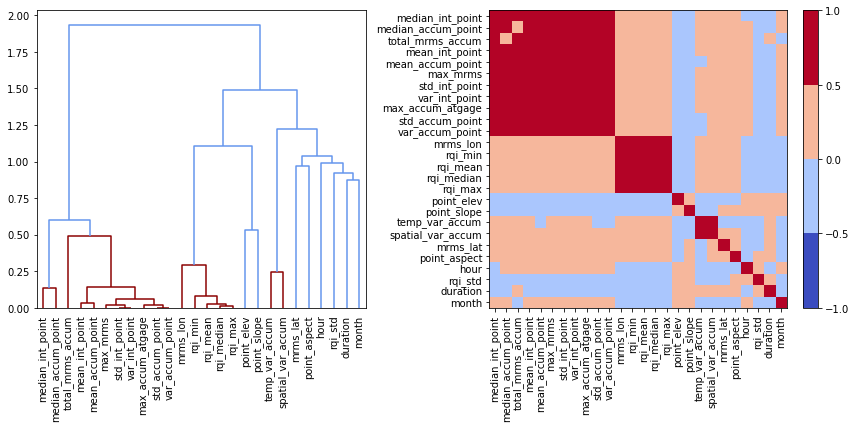

In [13]:
import sys
sys.path.append('test')
from feature_select import feature_select
all_permutations, plot = feature_select(X_train, df)

In [14]:
# RANDOMLY SAMPLE UNCORRELATED FEATURES TO SEE WHICH PERFORMS BEST
SAMPLE_permutations = random.sample(all_permutations, 10)
scores = []

name = "Gradient Boosting"
clf = GradientBoostingRegressor(random_state=0)
print(name)
for idx,perm in enumerate(SAMPLE_permutations):
    x = cross_validate(clf,X_train[:,perm],y_train, cv = cv,
                    scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'])
    print(idx)
    print(x['test_r2'])
    print(x['test_neg_mean_absolute_error'])
    print(x['test_neg_mean_squared_error'])
    print(x['test_neg_root_mean_squared_error'])

    print(x['test_r2'].mean())
    print(x['test_neg_mean_absolute_error'].mean())
    print(x['test_neg_mean_squared_error'].mean())
    print(x['test_neg_root_mean_squared_error'].mean())

    print(x['test_r2'].std())
    print(x['test_neg_mean_absolute_error'].std())
    print(x['test_neg_mean_squared_error'].std())
    print(x['test_neg_root_mean_squared_error'].std())

    scores.append([name,idx,
                    x['test_r2'].mean(),
                    x['test_r2'].std(),
                    x['test_neg_mean_absolute_error'].mean(),
                    x['test_neg_mean_absolute_error'].std(),
                    x['test_neg_mean_squared_error'].mean(),
                    x['test_neg_mean_squared_error'].std(),                                                                               x['test_neg_root_mean_squared_error'].mean(),
                    x['test_neg_root_mean_squared_error'].std()])

scores = pd.DataFrame(scores,columns=['names','IDX',
                            'test_r2_mean','test_r2_std',
                            'test_neg_mean_absolute_error_mean','test_neg_mean_absolute_error_std',
                            'test_neg_mean_squared_error_mean','test_neg_mean_squared_error_std',
                            'test_neg_root_mean_squared_error_mean','test_neg_root_mean_squared_error_std'])

Gradient Boosting
0
[0.73119886 0.70857505 0.78550211 0.78980416 0.77972269]
[-1.09469738 -0.96614275 -0.88329596 -0.92620896 -0.9116699 ]
[-5.01004003 -4.30633025 -2.98791101 -3.30175976 -3.10701732]
[-2.23831187 -2.07516993 -1.72855749 -1.81707451 -1.76267334]
0.7589605743780091
-0.9564029893976558
-3.7426116717067557
-1.9243574290068761
0.03285196701965558
0.07413173191578698
0.7863913719464084
0.19864580824372258
1
[0.74023822 0.72278368 0.7879903  0.79267632 0.77959514]
[-1.06618471 -0.93378591 -0.86329895 -0.90810144 -0.90455273]
[-4.84156037 -4.09637204 -2.95325101 -3.25664386 -3.10881631]
[-2.2003546  -2.02394961 -1.71850255 -1.80461737 -1.76318357]
0.7646567327892662
-0.9351847496386722
-3.651328717842483
-1.9021215416600388
0.027936803319326096
0.06928541015820618
0.7144400979197384
0.18237970993320704
2
[0.67338689 0.65905118 0.71551448 0.77298286 0.72966256]
[-1.18595698 -1.03877831 -0.96844255 -0.97476613 -0.98994796]
[-6.08756645 -5.038135   -3.96282414 -3.56598902 -3.813

In [15]:
scores

,names,IDX,test_r2_mean,test_r2_std,test_neg_mean_absolute_error_mean,test_neg_mean_absolute_error_std,test_neg_mean_squared_error_mean,test_neg_mean_squared_error_std,test_neg_root_mean_squared_error_mean,test_neg_root_mean_squared_error_std
0,Gradient Boosting,0,0.758961,0.032852,-0.956403,0.074132,-3.742612,0.786391,-1.924357,0.198646
1,Gradient Boosting,1,0.764657,0.027937,-0.935185,0.069285,-3.651329,0.714440,-1.902122,0.182380
2,Gradient Boosting,2,0.710120,0.040792,-1.031578,0.081033,-4.493526,0.942602,-2.108733,0.216265
3,Gradient Boosting,3,0.734691,0.031960,-0.982770,0.064321,-4.102536,0.730380,-2.017753,0.176663
4,Gradient Boosting,4,0.686546,0.022269,-1.165117,0.061638,-4.856255,0.798940,-2.196776,0.174438
5,Gradient Boosting,5,0.759530,0.024975,-0.944339,0.064013,-3.722400,0.643506,-1.922440,0.163168
6,Gradient Boosting,6,0.763464,0.026246,-0.960110,0.067855,-3.661913,0.656880,-1.906282,0.167335
7,Gradient Boosting,7,0.685558,0.024622,-1.168976,0.067639,-4.873530,0.825841,-2.200189,0.180824
8,Gradient Boosting,8,0.762683,0.025078,-0.963047,0.067204,-3.674955,0.654323,-1.909809,0.166089
9,Gradient Boosting,9,0.749342,0.033314,-0.962669,0.074720,-3.890580,0.824971,-1.962080,0.202042


In [16]:
scores.sort_values('test_neg_mean_absolute_error_mean').IDX

7    7
4    4
2    2
3    3
8    8
9    9
6    6
0    0
5    5
1    1
Name: IDX, dtype: int64

In [17]:
scores.sort_values('test_neg_mean_absolute_error_mean').IDX[-1]

KeyError: -1

In [18]:
scores.sort_values('test_neg_mean_absolute_error_mean').IDX.iloc[-1]

1

In [19]:
from scipy.stats import uniform, randint

param = {
    'n_estimators': randint(50, 200),  # Number of boosting stages to be run
    'learning_rate': uniform(0.01, 0.5),  # Learning rate
    'max_depth': randint(3, 10),  # Maximum depth of the individual trees
    'min_samples_split': randint(2, 20),  # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],
      'random_state': randint(0,1000)  # Number of features to consider at each split
    }

clf = GradientBoostingRegressor()

mod = RandomizedSearchCV(estimator=clf,
                    param_distributions = param,
                    n_iter=15, 
                    scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                    refit='neg_mean_absolute_error',
                    cv=cv)

_ = mod.fit(X_train[:,SAMPLE_permutations[1]],y_train)  

hyp = pd.DataFrame(mod.cv_results_).sort_values('neg_mean_absolute_error')

c:\ProgramData\miniconda3\envs\radar\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\ProgramData\miniconda3\envs\radar\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\ProgramData\miniconda3\envs\radar\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\ProgramData\miniconda3\envs\radar\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

KeyError: 'neg_mean_absolute_error'

In [20]:
hyp

NameError: name 'hyp' is not defined

In [21]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,5.467486,0.574171,0.015045,0.001305,0.015687,9,auto,8,5,60,...,0.921754,15,-2.683324,-2.425034,-2.151661,-2.284385,-2.207374,-2.350356,0.190116,15
1,1.394351,0.131981,0.009800,0.002316,0.485919,5,log2,6,4,88,...,0.692054,14,-2.403225,-2.230506,-1.983458,-2.039380,-2.028691,-2.137052,0.157769,14
2,4.976760,0.681874,0.009009,0.000904,0.093188,6,None,10,5,77,...,0.755836,2,-2.251232,-2.029159,-1.727885,-1.840722,-1.797517,-1.929303,0.189416,2
3,14.118623,1.520489,0.020798,0.004115,0.26726,7,auto,11,11,192,...,0.772219,10,-2.362947,-2.088631,-1.869664,-1.914298,-1.919146,-2.030937,0.182028,10
4,2.838768,0.140222,0.018198,0.003310,0.21474,7,sqrt,13,11,143,...,0.696813,6,-2.288209,-2.067045,-1.876448,-1.869058,-1.848344,-1.989821,0.168791,6
5,4.210005,0.309312,0.008599,0.001357,0.466671,7,None,6,2,64,...,0.850367,13,-2.471503,-2.132148,-1.923492,-2.024425,-2.006344,-2.111582,0.191841,13
6,12.476651,1.090663,0.018302,0.001938,0.155511,7,auto,3,19,174,...,0.734051,7,-2.301143,-2.089782,-1.804747,-1.926524,-1.870840,-1.998607,0.178293,7
7,5.045921,0.222809,0.008597,0.001356,0.362012,3,None,14,2,179,...,0.746198,8,-2.313975,-2.112458,-1.830719,-1.919181,-1.873313,-2.009929,0.179984,8
8,10.402856,0.426528,0.015303,0.002400,0.360216,6,None,16,17,191,...,0.836090,12,-2.422383,-2.146012,-1.890771,-1.972918,-1.946249,-2.075667,0.193212,12
9,0.857544,0.021853,0.007200,0.001166,0.048848,3,sqrt,6,2,110,...,0.699356,4,-2.227002,-2.060926,-1.809022,-1.810085,-1.791510,-1.939709,0.174972,4


In [22]:
pd.DataFrame(mod.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'param_random_state', 'params', 'split0_test_r2',
       'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2',
       'mean_test_r2', 'std_test_r2', 'rank_test_r2',
       'split0_test_neg_mean_absolute_error',
       'split1_test_neg_mean_absolute_error',
       'split2_test_neg_mean_absolute_error',
       'split3_test_neg_mean_absolute_error',
       'split4_test_neg_mean_absolute_error',
       'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error',
       'rank_test_neg_mean_absolute_error',
       'split0_test_neg_mean_squared_error',
       'split1_test_neg_mean_squared_error',
       'split2_test_neg_mean_squared_error',
       'split3_test_neg_mean_squared_error',
       'split4_test_neg_mean_squared_error',
 

In [23]:
hyp = pd.DataFrame(mod.cv_results_).sort_values('rank_test_neg_mean_absolute_error')

In [24]:
hyp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
2,4.976760,0.681874,0.009009,0.000904,0.093188,6,None,10,5,77,...,0.755836,2,-2.251232,-2.029159,-1.727885,-1.840722,-1.797517,-1.929303,0.189416,2
14,4.624290,0.165867,0.009000,0.001673,0.150078,5,auto,5,9,88,...,0.733084,3,-2.250040,-2.032661,-1.750354,-1.850588,-1.803262,-1.937381,0.182939,3
10,2.622912,0.083472,0.021800,0.030114,0.381723,5,auto,3,17,50,...,0.655372,5,-2.260623,-2.044224,-1.799989,-1.944087,-1.866944,-1.983174,0.160810,5
11,1.043419,0.083389,0.008399,0.000803,0.071589,3,log2,11,6,125,...,0.682305,1,-2.198281,-2.042567,-1.785869,-1.784715,-1.776274,-1.917541,0.172849,1
6,12.476651,1.090663,0.018302,0.001938,0.155511,7,auto,3,19,174,...,0.734051,7,-2.301143,-2.089782,-1.804747,-1.926524,-1.870840,-1.998607,0.178293,7
7,5.045921,0.222809,0.008597,0.001356,0.362012,3,None,14,2,179,...,0.746198,8,-2.313975,-2.112458,-1.830719,-1.919181,-1.873313,-2.009929,0.179984,8
13,13.817584,1.454888,0.020197,0.004116,0.170551,7,None,3,12,196,...,0.721766,9,-2.318109,-2.079178,-1.843377,-1.932800,-1.882188,-2.011131,0.173072,9
9,0.857544,0.021853,0.007200,0.001166,0.048848,3,sqrt,6,2,110,...,0.699356,4,-2.227002,-2.060926,-1.809022,-1.810085,-1.791510,-1.939709,0.174972,4
4,2.838768,0.140222,0.018198,0.003310,0.21474,7,sqrt,13,11,143,...,0.696813,6,-2.288209,-2.067045,-1.876448,-1.869058,-1.848344,-1.989821,0.168791,6
3,14.118623,1.520489,0.020798,0.004115,0.26726,7,auto,11,11,192,...,0.772219,10,-2.362947,-2.088631,-1.869664,-1.914298,-1.919146,-2.030937,0.182028,10


In [25]:
hyp.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'param_random_state', 'params', 'split0_test_r2',
       'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2',
       'mean_test_r2', 'std_test_r2', 'rank_test_r2',
       'split0_test_neg_mean_absolute_error',
       'split1_test_neg_mean_absolute_error',
       'split2_test_neg_mean_absolute_error',
       'split3_test_neg_mean_absolute_error',
       'split4_test_neg_mean_absolute_error',
       'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error',
       'rank_test_neg_mean_absolute_error',
       'split0_test_neg_mean_squared_error',
       'split1_test_neg_mean_squared_error',
       'split2_test_neg_mean_squared_error',
       'split3_test_neg_mean_squared_error',
       'split4_test_neg_mean_squared_error',
 

In [26]:
hyp['mean_test_r2']

2     0.758067
14    0.756053
10    0.744541
11    0.760593
6     0.740422
7     0.737369
13    0.737243
9     0.755083
4     0.742511
3     0.731971
8     0.720103
12    0.726334
5     0.710545
1     0.702893
0     0.641140
Name: mean_test_r2, dtype: float64

In [27]:
hyp['std_test_r2']

2     0.027792
14    0.026329
10    0.019552
11    0.028057
6     0.025424
7     0.026929
13    0.023026
9     0.028207
4     0.024652
3     0.025614
8     0.028033
12    0.028461
5     0.025283
1     0.024572
0     0.027842
Name: std_test_r2, dtype: float64

In [28]:
hyp['mean_test_neg_mean_absolute_error']

2    -0.940546
14   -0.945722
10   -0.969170
11   -0.972430
6    -0.988407
7    -0.994423
13   -1.000128
9    -1.003868
4    -1.004395
3    -1.018669
8    -1.037352
12   -1.050081
5    -1.060939
1    -1.084860
0    -1.297727
Name: mean_test_neg_mean_absolute_error, dtype: float64

In [29]:
hyp['std_test_neg_mean_absolute_error']

2     0.079134
14    0.075649
10    0.065075
11    0.066556
6     0.072591
7     0.074582
13    0.066704
9     0.067575
4     0.072808
3     0.074111
8     0.087689
12    0.083736
5     0.077937
1     0.083034
0     0.072117
Name: std_test_neg_mean_absolute_error, dtype: float64

In [30]:
hyp['mean_test_neg_mean_squared_error_mean']

KeyError: 'mean_test_neg_mean_squared_error_mean'

In [31]:
hyp['mean_test_neg_mean_squared_error']

2    -3.758089
14   -3.786912
10   -3.958838
11   -3.706840
6    -4.026219
7    -4.072210
13   -4.074600
9    -3.793085
4    -3.987877
3    -4.157840
8    -4.345722
12   -4.246323
5    -4.495583
1    -4.591882
0    -5.560316
Name: mean_test_neg_mean_squared_error, dtype: float64

In [32]:
hyp['mean_test_neg_root_mean_squared_error']

2    -1.929303
14   -1.937381
10   -1.983174
11   -1.917541
6    -1.998607
7    -2.009929
13   -2.011131
9    -1.939709
4    -1.989821
3    -2.030937
8    -2.075667
12   -2.051938
5    -2.111582
1    -2.137052
0    -2.350356
Name: mean_test_neg_root_mean_squared_error, dtype: float64

In [33]:
hyp.iloc[0]

mean_fit_time                                                                        4.97676
std_fit_time                                                                        0.681874
mean_score_time                                                                     0.009009
std_score_time                                                                      0.000904
param_learning_rate                                                                 0.093188
param_max_depth                                                                            6
param_max_features                                                                      None
param_min_samples_leaf                                                                    10
param_min_samples_split                                                                    5
param_n_estimators                                                                        77
param_random_state                                                    

In [34]:
hyp.iloc[0].params

{'learning_rate': 0.09318794343729946,
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 77,
 'random_state': 781}

In [35]:
train

,mrms_lat,mrms_lon,total_mrms_accum,rqi_mean,rqi_median,rqi_min,rqi_max,rqi_std,norm_diff,max_mrms,...,var_accum_point,mean_accum_point,duration,month,hour,point_elev,point_slope,point_aspect,temp_var_accum,spatial_var_accum
0,38.835,253.874999,2.280000,0.300000,0.3,0.3,0.3,0.00000,0.920511,1.853333,...,0.000192,0.026824,201,5,16,2421,2.322102,0.000000,1046.084473,10.587929
1,38.835,253.874999,1.980000,0.300000,0.3,0.3,0.3,0.00000,0.982514,2.253333,...,0.000385,0.028286,188,5,0,2421,2.322102,0.000000,1046.084473,10.587929
2,38.835,253.874999,4.470000,0.300000,0.3,0.3,0.3,0.00000,1.045174,3.933333,...,0.000890,0.037881,383,5,16,2421,2.322102,0.000000,523.261811,5.366137
3,38.835,253.874999,3.876667,0.300000,0.3,0.3,0.3,0.00000,1.928515,5.253333,...,0.003354,0.053105,262,5,16,2421,2.322102,0.000000,911.871033,2.673716
4,38.835,253.874999,1.946667,0.300000,0.3,0.3,0.3,0.00000,1.305147,4.333334,...,0.002519,0.047480,162,5,16,2421,2.322102,0.000000,492.463257,3.298109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28837,39.165,254.684999,10.263334,0.900000,0.9,0.9,0.9,0.00000,1.522877,4.520000,...,0.001128,0.057985,435,9,8,2310,23.665241,177.878906,570.393005,4.856066
28838,39.165,254.684999,17.330001,0.900000,0.9,0.9,0.9,0.00000,2.547541,7.533334,...,0.003469,0.110382,326,9,16,2310,23.665241,177.878906,1140.786011,9.681311
28839,39.165,254.684999,2.946667,0.863333,0.9,0.7,0.9,0.07755,2.768338,4.893334,...,0.002238,0.092083,149,9,16,2310,23.665241,177.878906,73.550161,1.188579
28840,39.165,254.684999,11.400001,0.900000,0.9,0.9,0.9,0.00000,3.137760,9.680000,...,0.006911,0.129545,359,9,16,2310,23.665241,177.878906,266.921180,1.543202


In [36]:
# compare train/test permutation feature importance for each model, look for consistency and overfitting
param = {'learning_rate': 0.09318794343729946,
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 77,
 'random_state': 781}

clf = GradientBoostingRegressor(**param)

train_result = permutation_importance(
    clf, X_train[:,SAMPLE_permutations[1]], y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    clf, X_test[:,SAMPLE_permutations[1]], y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=train[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=test[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

NameError: name 'permutation_importance' is not defined

In [37]:
from sklearn.inspection import permutation_importance
# compare train/test permutation feature importance for each model, look for consistency and overfitting
param = {'learning_rate': 0.09318794343729946,
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 77,
 'random_state': 781}

clf = GradientBoostingRegressor(**param)

train_result = permutation_importance(
    clf, X_train[:,SAMPLE_permutations[1]], y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    clf, X_test[:,SAMPLE_permutations[1]], y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=train[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=test[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [38]:
from sklearn.inspection import permutation_importance
# compare train/test permutation feature importance for each model, look for consistency and overfitting
param = {'learning_rate': 0.09318794343729946,
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 77,
 'random_state': 781}

clf = GradientBoostingRegressor(**param)
clf.fit(X_train[:,SAMPLE_permutations[1]], y_train)

train_result = permutation_importance(
    clf, X_train[:,SAMPLE_permutations[1]], y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    clf, X_test[:,SAMPLE_permutations[1]], y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=train[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=test[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

InvalidIndexError: (slice(None, None, None), (0, 6, 11, 7, 10, 18, 19, 20, 21, 22, 23, 25))

In [39]:
sorted_importances_idx

array([ 3,  7,  9, 10,  8, 11,  0,  5,  6,  1,  4,  2], dtype=int64)

In [40]:
train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=train.iloc[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=test.iloc[:,SAMPLE_permutations[1]].columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

IndexingError: Too many indexers

In [41]:
train.iloc[:,SAMPLE_permutations[1]]

IndexingError: Too many indexers

In [42]:
train

,mrms_lat,mrms_lon,total_mrms_accum,rqi_mean,rqi_median,rqi_min,rqi_max,rqi_std,norm_diff,max_mrms,...,var_accum_point,mean_accum_point,duration,month,hour,point_elev,point_slope,point_aspect,temp_var_accum,spatial_var_accum
0,38.835,253.874999,2.280000,0.300000,0.3,0.3,0.3,0.00000,0.920511,1.853333,...,0.000192,0.026824,201,5,16,2421,2.322102,0.000000,1046.084473,10.587929
1,38.835,253.874999,1.980000,0.300000,0.3,0.3,0.3,0.00000,0.982514,2.253333,...,0.000385,0.028286,188,5,0,2421,2.322102,0.000000,1046.084473,10.587929
2,38.835,253.874999,4.470000,0.300000,0.3,0.3,0.3,0.00000,1.045174,3.933333,...,0.000890,0.037881,383,5,16,2421,2.322102,0.000000,523.261811,5.366137
3,38.835,253.874999,3.876667,0.300000,0.3,0.3,0.3,0.00000,1.928515,5.253333,...,0.003354,0.053105,262,5,16,2421,2.322102,0.000000,911.871033,2.673716
4,38.835,253.874999,1.946667,0.300000,0.3,0.3,0.3,0.00000,1.305147,4.333334,...,0.002519,0.047480,162,5,16,2421,2.322102,0.000000,492.463257,3.298109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28837,39.165,254.684999,10.263334,0.900000,0.9,0.9,0.9,0.00000,1.522877,4.520000,...,0.001128,0.057985,435,9,8,2310,23.665241,177.878906,570.393005,4.856066
28838,39.165,254.684999,17.330001,0.900000,0.9,0.9,0.9,0.00000,2.547541,7.533334,...,0.003469,0.110382,326,9,16,2310,23.665241,177.878906,1140.786011,9.681311
28839,39.165,254.684999,2.946667,0.863333,0.9,0.7,0.9,0.07755,2.768338,4.893334,...,0.002238,0.092083,149,9,16,2310,23.665241,177.878906,73.550161,1.188579
28840,39.165,254.684999,11.400001,0.900000,0.9,0.9,0.9,0.00000,3.137760,9.680000,...,0.006911,0.129545,359,9,16,2310,23.665241,177.878906,266.921180,1.543202


In [43]:
test.iloc[:,[0,2]]

,mrms_lat,total_mrms_accum
62,39.365,2.803333
63,39.365,2.350000
64,39.365,4.600000
65,39.365,1.913333
66,39.365,1.250000
...,...,...
34739,40.105,1.173333
34740,40.105,2.373333
34741,40.105,3.410000
34742,40.105,2.750000


In [44]:
SAMPLE_permutations[1]

(0, 6, 11, 7, 10, 18, 19, 20, 21, 22, 23, 25)

In [45]:
test

,mrms_lat,mrms_lon,total_mrms_accum,rqi_mean,rqi_median,rqi_min,rqi_max,rqi_std,norm_diff,max_mrms,...,var_accum_point,mean_accum_point,duration,month,hour,point_elev,point_slope,point_aspect,temp_var_accum,spatial_var_accum
62,39.365,252.794999,2.803333,0.4,0.4,0.4,0.4,0.0,1.035264,3.253334,...,0.000961,0.036886,219,5,16,1924,0.734675,71.565048,834.402344,11.723897
63,39.365,252.794999,2.350000,0.4,0.4,0.4,0.4,0.0,1.610063,1.680000,...,0.000181,0.025269,479,5,0,1924,0.734675,71.565048,834.402344,11.723897
64,39.365,252.794999,4.600000,0.4,0.4,0.4,0.4,0.0,0.679583,1.053333,...,0.000048,0.020175,479,5,8,1924,0.734675,71.565048,834.402344,11.723897
65,39.365,252.794999,1.913333,0.7,0.7,0.7,0.7,0.0,0.974930,2.600000,...,0.000656,0.026948,344,5,16,1924,0.734675,71.565048,1046.084473,10.587929
66,39.365,252.794999,1.250000,0.7,0.7,0.7,0.7,0.0,0.499873,1.413333,...,0.000123,0.017123,383,5,16,1924,0.734675,71.565048,233.622985,1.063757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34739,40.105,253.994999,1.173333,0.5,0.5,0.5,0.5,0.0,1.780967,2.200000,...,0.000359,0.051014,58,8,0,2386,1.970671,315.000000,1350.801880,11.866839
34740,40.105,253.994999,2.373333,0.5,0.5,0.5,0.5,0.0,2.405102,5.973334,...,0.005137,0.059333,157,8,16,2386,1.970671,315.000000,53.989981,2.968386
34741,40.105,253.994999,3.410000,0.5,0.5,0.5,0.5,0.0,1.183257,3.226667,...,0.001635,0.052462,252,8,16,2386,1.970671,315.000000,1540.936768,9.389552
34742,40.105,253.994999,2.750000,0.5,0.5,0.5,0.5,0.0,5.957777,9.573334,...,0.052223,0.211538,38,8,0,2386,1.970671,315.000000,783.677490,7.182773


In [46]:
type(SAMPLE_permutations[1])

tuple

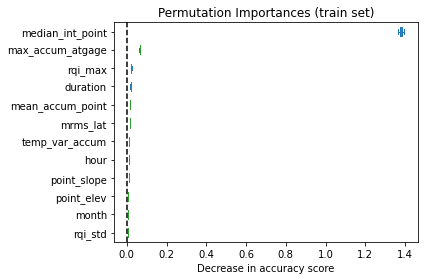

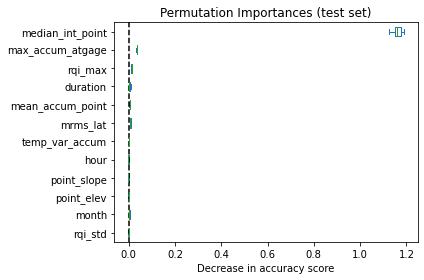

In [47]:
train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=train.iloc[:,list(SAMPLE_permutations[1])].columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=test.iloc[:,list(SAMPLE_permutations[1])].columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

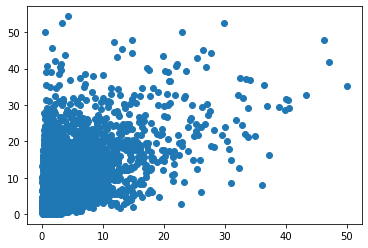

In [48]:
plt.scatter(df.median_int_point,df.norm_diff)

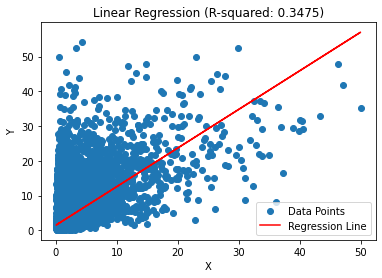

In [49]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Example data
x = df.median_int_point
y = df.norm_diff

# Calculating the slope (m) and intercept (b) of the regression line
m, b = np.polyfit(x, y, 1)  # 1 denotes linear regression (degree 1)

# Generating the regression line
regression_line = m * x + b

# Calculating R-squared
r_squared = r2_score(y, regression_line)

# Plotting the scatter plot of the data points
plt.scatter(x, y, label='Data Points')

# Plotting the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Adding labels, title, and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Linear Regression (R-squared: {r_squared:.4f})')
plt.legend()

# Display the plot
plt.show()